# ChatGPT History Export Data Analysis

Data Analysis and Data Visualization for your ChatGPT History

For setup, export parsing, and initial conversion to CSV see `chatpt_data_analysis.ipynb`

-----

## Dependencies

In [1]:
# import argparse
import json
import os
import re
from collections import defaultdict
from typing import Any

from datetime import date, datetime as dt, timedelta as td
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Korean Font
# Setting the Korean font
# Update the path to the font if needed
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic-Regular.ttf'
fontprop = fm.FontProperties(fname=font_path)

In [3]:
# import
data = pd.read_csv("data/chatgpt_messages.csv")

In [4]:
# data check
data.head()

,conversation_title,author,message,msg_date
0,소프트웨어 개발 업종 코드,ChatGPT,NaN,NaN
1,소프트웨어 개발 업종 코드,User,"notion, discord, twitter, fmkorea.net, 머신러닝 및 ...",2024-04-17 22:53:20
2,소프트웨어 개발 업종 코드,ChatGPT,개인 사업자로 등록할 때 선택하는 업종 코드는 사업의 주된 내용을 기반으로 결정됩니...,2024-04-17 22:54:06
3,소프트웨어 개발 업종 코드,User,"{'content_type': 'image_asset_pointer', 'asset...",2024-04-17 22:58:10
4,소프트웨어 개발 업종 코드,ChatGPT,제공해주신 이미지에는 다양한 업종 코드가 나열되어 있습니다. 머신러닝 및 딥러닝을 ...,2024-04-17 22:58:42


In [5]:
print('{:,} total messages'.format(len(data)))
print('{:,} total conversations'.format(len(data['conversation_title'].unique())))
# print('{:,} total authors'.format(len(data['author'].unique())))

14,911 total messages
1,612 total conversations


In [6]:
# drop NaN date rows
data.dropna(inplace=True)

In [7]:
# date additions
data['timestamp'] = pd.to_datetime(data['msg_date'])
data['date'] = data['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d')) # note: not very efficient
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['mnth_yr'] = data['timestamp'].apply(lambda x: x.strftime('%Y-%m')) # note: not very efficient
data['day'] = data['timestamp'].dt.day
data['dow'] = data['timestamp'].dt.weekday
data['hour'] = data['timestamp'].dt.hour

In [8]:
data.tail()

,conversation_title,author,message,msg_date,timestamp,date,year,month,mnth_yr,day,dow,hour
14904,Mismatched Gestures Type,ChatGPT,"The error message `Variable ""$gestures"" of typ...",2023-08-23 00:16:18,2023-08-23 00:16:18,2023-08-23,2023,8,2023-08,23,2,0
14906,Fix GraphQL Mutation Bugs,User,\nconst UPDATE_CHILD = gql`\n mutation update...,2023-08-23 00:03:02,2023-08-23 00:03:02,2023-08-23,2023,8,2023-08,23,2,0
14907,Fix GraphQL Mutation Bugs,ChatGPT,"네, 주어진 코드에서 몇 가지 문제점을 발견했습니다:\n\n1. `updateChi...",2023-08-23 00:03:44,2023-08-23 00:03:44,2023-08-23,2023,8,2023-08,23,2,0
14909,Add 'id' field.,User,@InputType()\nexport class ChildUpdateInput {\...,2023-08-22 23:47:54,2023-08-22 23:47:54,2023-08-22,2023,8,2023-08,22,1,23
14910,Add 'id' field.,ChatGPT,"네, `ChildUpdateInput` 클래스에 `id` 필드를 추가하려면 다음과 ...",2023-08-22 23:48:50,2023-08-22 23:48:50,2023-08-22,2023,8,2023-08,22,1,23


----

## Most Msgs by Convo

In [9]:
convo_msgs = data['conversation_title'].value_counts().sort_values()

In [10]:
(pd.DataFrame(convo_msgs)).to_csv("data/convo_msgs_count.csv", encoding='utf-8')

In [11]:
convo_msgs_count = pd.read_csv("data/convo_msgs_count.csv")

In [12]:
convo_msgs_count.tail()

,conversation_title,count
1606,Design App Icons,82
1607,Dockerfile 경로 수정,82
1608,RagingBlow Illustration,118
1609,Vault Server Configuration Setup,142
1610,New chat,337


In [13]:
most_convo_msgs_count = convo_msgs_count.tail(30)

In [14]:
# TODO: Trim long titles

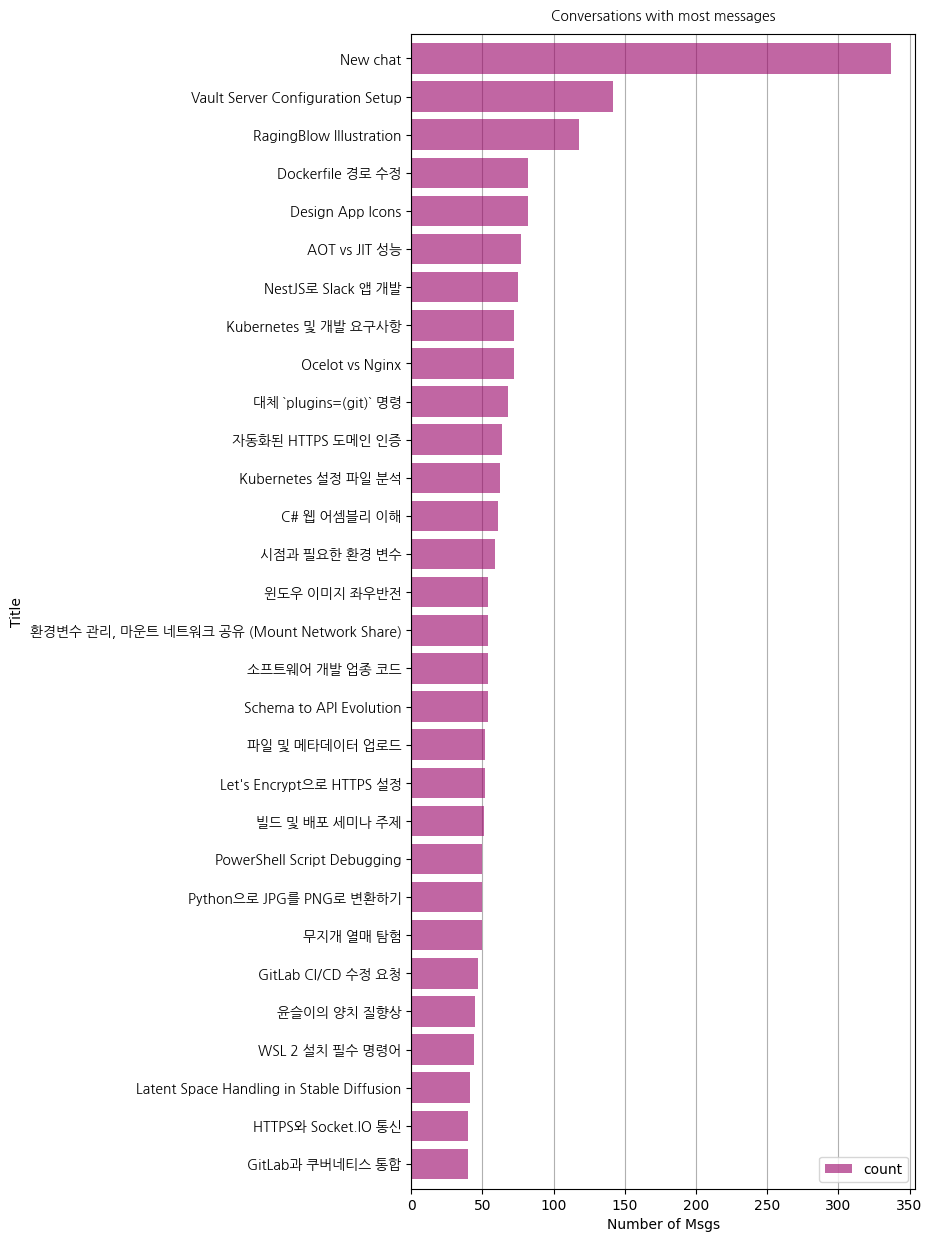

In [15]:
ax = most_convo_msgs_count.plot(kind='barh', figsize=[6.5, 15], width=0.8, alpha=0.6, color='#990066', 
                                    edgecolor=None, zorder=2)

n_groups = len(most_convo_msgs_count)
index = np.arange(n_groups)

ax.xaxis.grid(True)
ax.set_xlabel('Number of Msgs')
ax.set_ylabel("Title")
plt.yticks(index, most_convo_msgs_count.conversation_title, fontproperties=fontprop)

ax.set_title('Conversations with most messages', fontproperties=fontprop, y=1.005)

plt.savefig('output/chatgpt-most-messaged-conversations.png', dpi=96, bbox_inches='tight')
plt.show()

----

## Analysis by Year

In [16]:
year_counts = data['year'].value_counts().sort_index()
year_counts

year
2023    7404
2024    5595
Name: count, dtype: int64

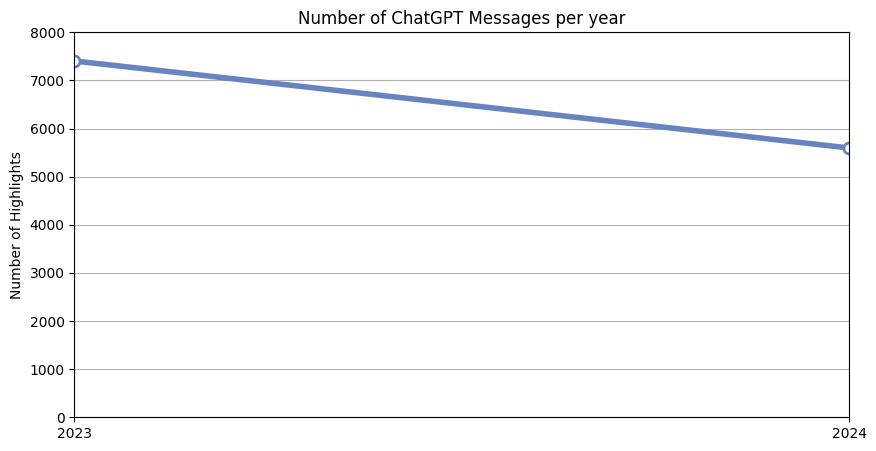

In [17]:
dataset = year_counts
chart_title = 'Number of ChatGPT Messages per year'

ax = year_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, 8000)
ax.set_xticks(dataset.index)
ax.set_ylabel('Number of Highlights')
ax.set_xlabel('')
ax.set_title(chart_title)

plt.show()

-----

## Monthly Analysis

In [18]:
month_counts = data['mnth_yr'].value_counts().sort_index()
month_counts.columns = ['Count']
month_counts.tail()

mnth_yr
2023-12    1700
2024-01    1462
2024-02    1021
2024-03    2089
2024-04    1023
Name: count, dtype: int64

In [19]:
# not every month necessarily has a highlight, so fill in missing months with zero counts
#date_range = pd.date_range(start=min(highlights_10['timestamp']), end=max(highlights_10['timestamp']))
#months_range = date_range.map(lambda x: str(x.date())[:-3])
#index = np.unique(months_range)
# month_counts = month_counts.reindex(index, fill_value=0)

In [20]:
# total months
len(month_counts)

9

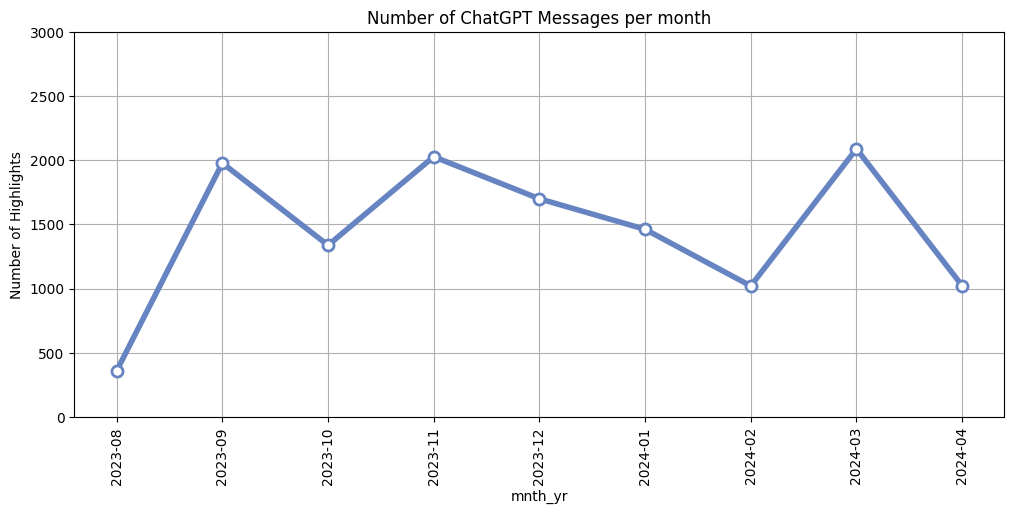

In [21]:
dataset = month_counts.tail(20)
chart_title = 'Number of ChatGPT Messages per month'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, 3000)
ax.set_xticks(index)
ax.set_ylabel('Number of Highlights')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.savefig('output/chatgpt-messages-per-month.png', dpi=96, bbox_inches='tight')
# plt.show()

-----

## Highlights Per Day

In [22]:
# data.tail()

In [23]:
daily_counts = data['date'].value_counts().sort_index()
daily_counts.columns = ['Count']

In [24]:
# daily_counts.tail(10)

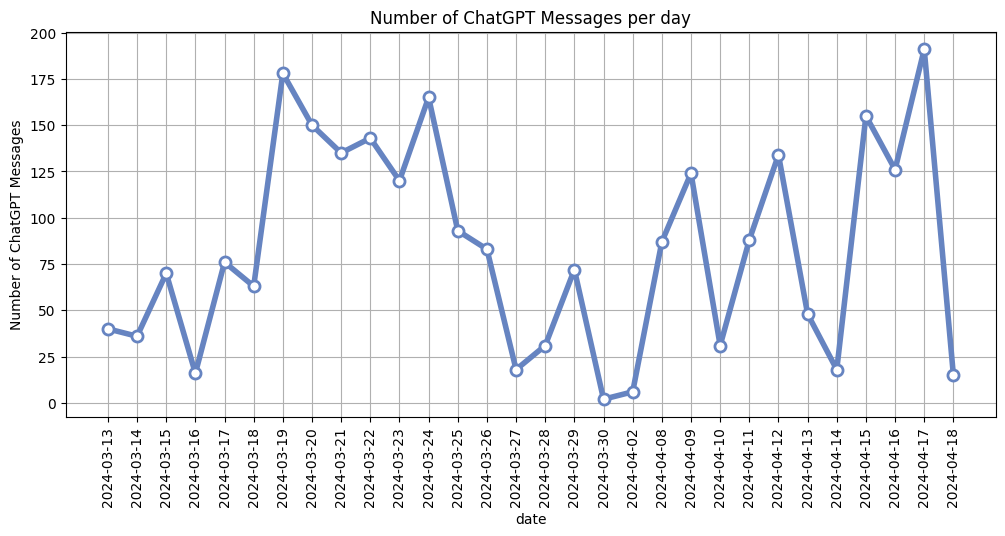

In [25]:
# a bit of a hackish solution, could use improvement
dataset = daily_counts.tail(30)
chart_title = 'Number of ChatGPT Messages per day'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Number of ChatGPT Messages')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.savefig('output/chatgpt-messages-per-day.png', dpi=96, bbox_inches='tight')
# plt.show()

In [26]:
daily_counts.to_csv("data/daily_count_chatgpt_msgs.csv")

------

# Time Period Review

Example: Year in Review

In [27]:
target_period = 2023
period_clippings = data[data['year'] == target_period]

In [28]:
per_month_counts = period_clippings['mnth_yr'].value_counts().sort_index()
per_month_counts.columns = ['Count']
per_month_counts.tail(12)

mnth_yr
2023-08     360
2023-09    1978
2023-10    1338
2023-11    2028
2023-12    1700
Name: count, dtype: int64

In [29]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [30]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


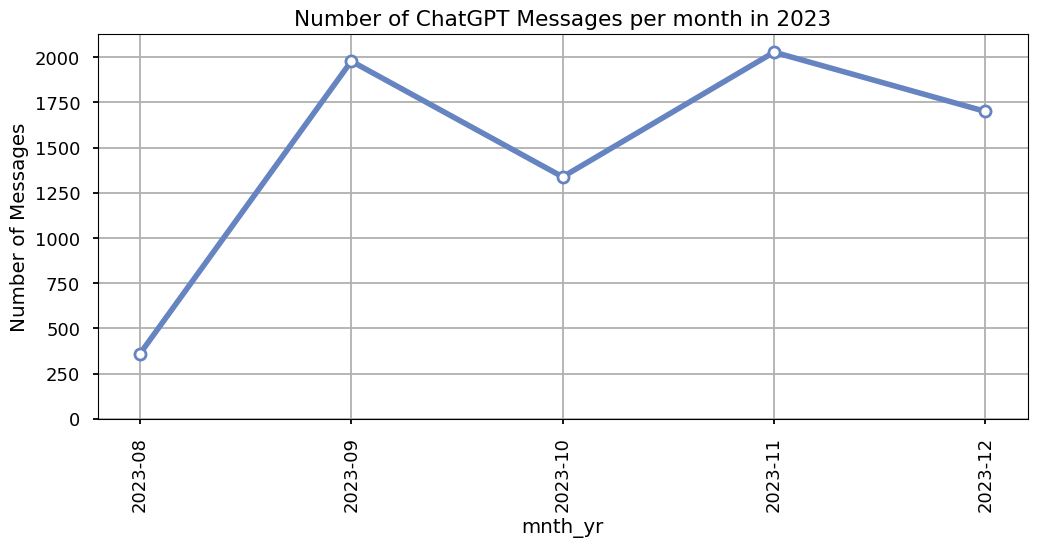

In [31]:
dataset = per_month_counts
chart_title = 'Number of ChatGPT Messages per month in ' + str(target_period)
import seaborn as sns
# plt.style.use('seaborn-darkgrid')
plt.style.use('seaborn-v0_8-talk')

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
max = dataset.max() + (dataset.max() * 0.05)
ax.set_ylim(0, max)
ax.set_xticks(index)
ax.set_ylabel('Number of Messages')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

In [32]:
# Top Clipped Books in Period
top_msg_convos = period_clippings['conversation_title'].value_counts().sort_values(ascending=False)

In [33]:
# Period Book Highlights Summary

print('====== ChatGPT Messages Summary for ' + str(target_period) + ' ======')
print('{:,} total conversations'.format(len(top_msg_convos)))
print('{:} average number of messages per convo'.format(round(top_msg_convos.mean(), 1)))
print(' ')

print('{:} monthly average'.format(round(per_month_counts.mean(), 1)))
print('{:} most in a month'.format(per_month_counts.max()))
print('{:} least in a month'.format(per_month_counts.min()))

print(' ')
print('Top Active or Messaged Conversations:')
for i, v in top_msg_convos.head(20).items():
    print("* " + str(v) + " in " + i)

====== ChatGPT Messages Summary for 2023 ======
870 total conversations
8.5 average number of messages per convo
 
1480.8 monthly average
2028 most in a month
360 least in a month
 
Top Active or Messaged Conversations:
* 186 in New chat
* 142 in Vault Server Configuration Setup
* 82 in Design App Icons
* 82 in Dockerfile 경로 수정
* 77 in AOT vs JIT 성능
* 75 in NestJS로 Slack 앱 개발
* 72 in Ocelot vs Nginx
* 72 in Kubernetes 및 개발 요구사항
* 68 in 대체 `plugins=(git)` 명령
* 64 in 자동화된 HTTPS 도메인 인증
* 61 in C# 웹 어셈블리 이해
* 59 in 시점과 필요한 환경 변수
* 54 in 환경변수 관리, 마운트 네트워크 공유 (Mount Network Share)
* 52 in Let's Encrypt으로 HTTPS 설정
* 51 in 빌드 및 배포 세미나 주제
* 50 in 무지개 열매 탐험
* 50 in PowerShell Script Debugging
* 47 in GitLab CI/CD 수정 요청
* 45 in 윤슬이의 양치 질향상
* 44 in WSL 2 설치 필수 명령어


# Word Cloud of Highlights

In [34]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [36]:
stopwords = set(STOPWORDS)

In [37]:
# adjust accordingly
nsw = ["medium", "new", "york", "times", "NYTimes", "Forbes", "TED", "yorker", 
       "YouTube", "nan", "Wired", "Wikipedia", "free", "encyclopedia", "WikiTravel", "best"] 
for i in nsw:
    stopwords.add(i)

In [38]:
data.columns

Index(['conversation_title', 'author', 'message', 'msg_date', 'timestamp',
       'date', 'year', 'month', 'mnth_yr', 'day', 'dow', 'hour'],
      dtype='object')

```sh
sudo apt install openjdk-11-jdk
sudo update-alternatives --config java
echo "export JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64" >> ~/.bashrc
echo "export PATH=$PATH:$JAVA_HOME/bin" >> ~/.bashrc
echo "export JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64" >> ~/.zshrc
echo "export PATH=$PATH:$JAVA_HOME/bin" >> ~/.zhrc
```

In [ ]:
%pip install konlpy JPype1

In [40]:
from konlpy.tag import Okt
# 한국어 형태소 분석기 초기화
okt = Okt()

In [41]:
words_in_messages = ""

for index, row in data.iterrows():
    if row["message"] != '':
        # words_in_messages =  words_in_messages + " " + str(row["message"])
        # 형태소 분석을 통해 명사만 추출
        nouns = ' '.join(okt.nouns(row["message"]))
        words_in_messages += " " + nouns

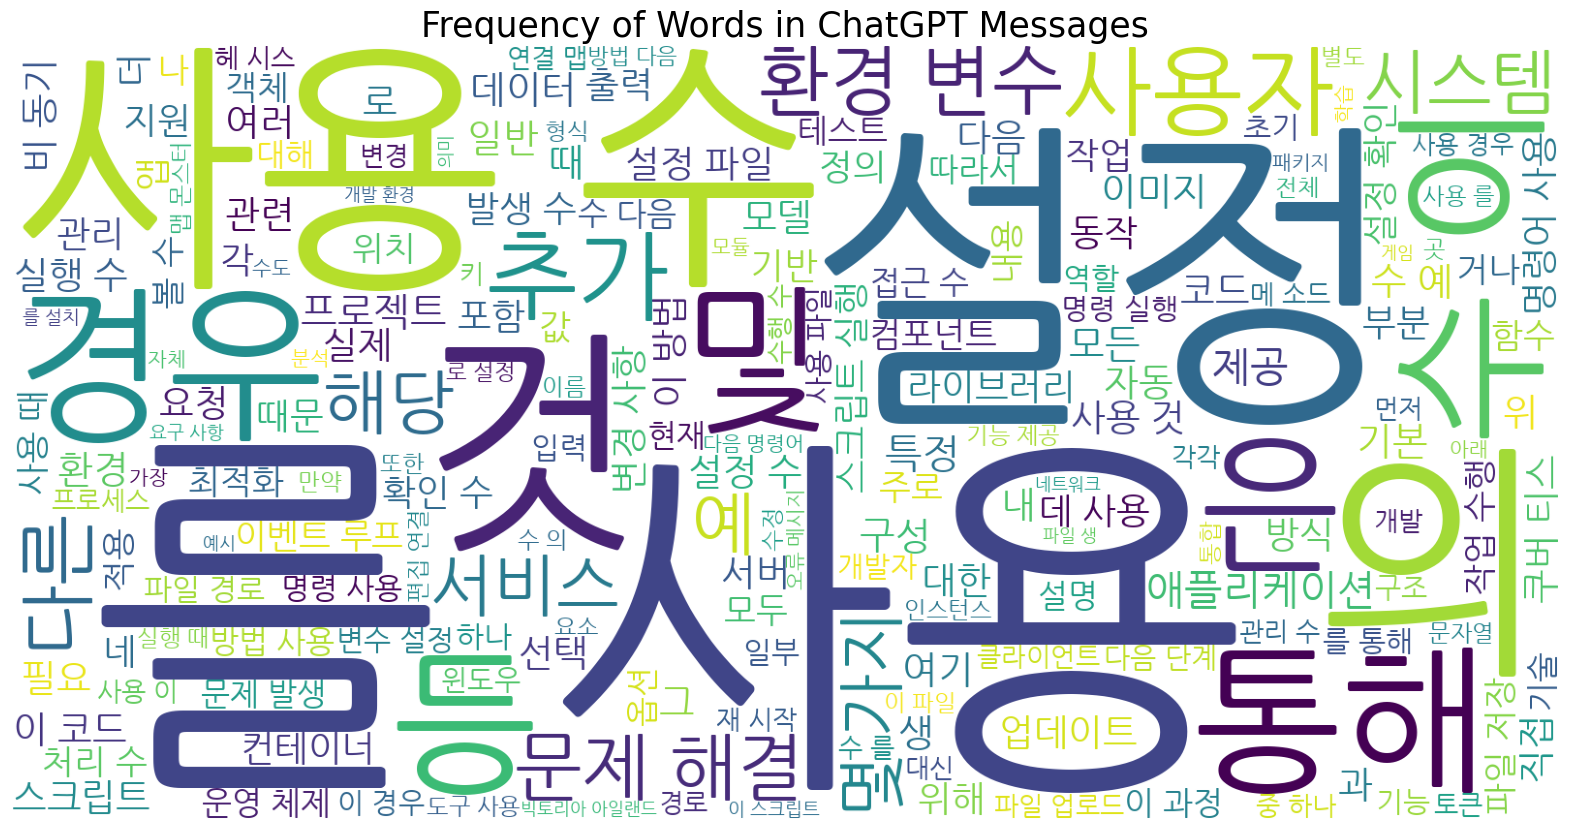

In [42]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=800, font_path=font_path)
wordcloud.generate(words_in_messages)

plt.figure(figsize=(20,40))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Frequency of Words in ChatGPT Messages", fontsize=25)

# plt.show()
plt.savefig('output/chatgpt-messages-wordcloud.png', dpi=96, bbox_inches='tight')

# Words in Titles for a Single Year

In [ ]:
# Check For Single Year Only
check_year = 2024

words_in_messages = ""

for index, row in data[data.year == check_year].iterrows():
    if row["message"] != '':
        words_in_messages =  words_in_messages + " " + str(row["message"])

        
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=400, font_path=font_path)
wordcloud.generate(words_in_messages)

plt.figure(figsize=(20,60))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Words in ChatGPT Messages in " + str(check_year), fontsize=25)
plt.show()